<b> Capstone Project - Credit Card Fraud Detection Model</b>

<b>Author:</b> Syed Mohammad Bilal & Raj Vala

<div class="alert alert-block alert-success">

### The steps are broadly:
1. Reading and understanding the data
    - shape(99999 rows and 226 columns), info, describe, duplicate values check, concat both the data files into 1 `fraud_data`
2. Cleaning the data
    - check the null values 
    - Dropping Unnecessary Columns which are not needed for Analysis
    - Converting columns to appropriate formats
    - bifurcation of columns for better understanding
    - binning on `job` and `state` column as having analogous entries

3. Visualization of data
    - correlation
    - 3.1) Univariate Analysis
            - Numerical
            - Categorical
    - 3.2) Multivariate Analysis
            - Visualising Numerical - Numerical Variables
            - Visualising Categorical- Categorical Variables
            - Visualising Numerical - Categorical Variables
           
4. Data preparation
    - 4.1) Derive new features
            -`age`, `trans_Year`, `trans_Month`, `month_of_year`,`trans_Hour`, `trans_Day`,`trans_weekday`,`dist`
            - `amt_by_moving_average`,`distance_over_time`,`distance_between_merchants`
    - 4.2) Conducting appropriate exploratory analysis to extract useful INSIGHTS (whether directly useful for business or for eventual modelling/feature engineering).
            1.Fraud transactions in 2019 ans 2020
            2. Fraud transaction based on gender
            3. Fraud transcations in months
            4. Fraud transactions in weekdays
            5. Fraud transaction on daywise
            6. Hourly based Fraud Transactions
            7.Fraud Transaction in age_bins
            8. Fraud Transactions in categories
            9. Fraud Transactions in job
            10. Fraud Transactions in State
            11. Fraud Transactions in State_bin
            12. Fraud Transactions in city (top 20)
            13. Fraud Transactions in street(top 20)
            14. Fraud Transactions in merchant(top 20)
            15. Mean of Fraud and non Fraud Transactions
            16. Overall Amount Distribution
            17. Fraud Transactions in AMT
            18. Fraud Transactions in city population
            19. Fraud Transactions in dist
            20. Fraud Transactions in time_since_prev_transaction
            21. Fraud Transactions in distance_between_merchants
            22. Fraud Transactions in 30 Day Transactions by Customers
            23. Fraud Transactions in 30 Day Orders Amt Avg by Customers
            24. Fraud Transactions in 24 hours Orders Amt Avg by Customers
            25. Fraud Transactions based on category and amt
            26. Fraud Transactions based on state vs amt and trans_day vs amt
            27. Fraud Transactions based on age_bin vs amt , trans_year vs amt
            28. Fraud Transactions based on job , merchant with amt
            29. Fraud Transactions based on trans_hour , gender with amt
            30. Fraud Transactions based on trans_month, trans_weekday with amt
            31. Amount by percentage of transactions
            32. Year Month vs Number of Transactions
            33. Year Month vs Number of Customers Done the Transactions
            34. num_of_fraud_transactions
            35. fraud_customers based on Transaction on month wise
            36. Fraudulent transactions on amount
            37. KDE plot to visualize the distribution of Amount for both the classes
            38. Time Distribution plot for transactions
    - 4.3) Cost Benefit Analysis(part 1)
            - Average number of transactions per month
            - Average number of fraudulent transaction per month
            - Average amount per fraud transaction

5. preparation of data for modelling
    - Check Correlation
    - Drop features which are not seems to be useful for model as correlation is high 
        - 5.1) Creating Dummy for few variables and using Label encoding for few variables 
        - 5.2) Splitting the Data into X & y
        - 5.3) Test-Train Split
        - 5.4) Checking for Class imbalance in Train & Test and treating it
              - SMOTE
              - ADASYN
6. Modelling
    - Model 1: Decision Tree
        - Decision Tree  (Default Hyperparameters for both SMOTE and ADASYN)
        - Decision Tree  (Hyperparameter Tuning for SMOTE)
    - Model 2: Random Forest
        - Random Forest (Default Hyperparameters for both SMOTE and ADASYN)
        - Random Forest (Hyperparameters Tuning for SMOTE)
    - Model 3: XGBoost 
        - XGBoost (Default Hyperparameters for both SMOTE and ADASYN)
        - XGBoost (Hyperparameters Tuning for SMOTE)
7. Final analysis
    - Cost Benefit Analsys (part 2)
8. Recommendation of strategies to manage customer churn based on our observations.
 
</div>

<div class="alert alert-block alert-info">

# Project Summary:
    
## Problem Statement:-
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

 
**Buisness Objective:-** Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.
 

**Our Objective:-** In this project, we will analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.
    
  
    
</div>

#### Data Dictionary for Credit Card Transactions
    index - Unique Identifier for each row
    transdatetrans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class

### Step 1: Reading and understanding the Data

In [568]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [569]:
# Lets import the required libraries and packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [570]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [571]:
# Lets import and read the dataset
fraud_train = pd.read_csv('fraudTrain.csv')
fraud_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [572]:
# Lets see the head of our dataset
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [573]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<div class="alert alert-block alert-info">   

#### Inference:- There are 1296675 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [575]:
# Lets check the summary of the dataset
fraud_train.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,894,51,NaN,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,NaN,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,5617,94876,NaN,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,NaN,NaN,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,NaN,NaN,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,NaN,NaN,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


#### Now lets check if the dataset has any duplicates.

In [577]:
# checking duplicates
sum(fraud_train.duplicated(subset = 'cc_num')) == 0

False

In [578]:
# Lets check the dimensions of the dataset
fraud_train.shape

(1296675, 23)

In [579]:
fraud_train.drop_duplicates()
fraud_train.shape

(1296675, 23)

<div class="alert alert-block alert-info">   

#### Inference:- No duplicate values
</div>

In [581]:
# Lets import and read the dataset
fraud_test = pd.read_csv('fraudTest.csv')
fraud_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [582]:
# Lets see the head of our dataset
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [583]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

<div class="alert alert-block alert-info">   

#### Inference:- There are 555719 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [585]:
# Lets check the summary of the dataset
fraud_test.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,555719,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,849,50,NaN,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,NaN,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,2423,40393,NaN,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,NaN,NaN,48842.628015,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,NaN,NaN,26855.283328,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1257.000000,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,NaN,NaN,26292.000000,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,NaN,NaN,48174.000000,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,NaN,NaN,72011.000000,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


#### Now lets check if the dataset has any duplicates.

In [587]:
# checking duplicates
sum(fraud_test.duplicated(subset = 'cc_num')) == 0

False

In [588]:
# Lets check the dimensions of the dataset
fraud_test.shape

(555719, 23)

In [589]:
# Deleting duplicates if they are present
fraud_test.drop_duplicates()
fraud_test.shape

(555719, 23)

<div class="alert alert-block alert-info">   

#### Inference:- No duplicate values
</div>

#### Concatenating both the train and test data for further analysis

In [592]:
# Lets concatenate both train and test data
fraud_data = pd.concat([fraud_train, fraud_test])
fraud_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [593]:
# Lets check the dimensions of the dataset
fraud_data.shape

(1852394, 23)

In [594]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

<div class="alert alert-block alert-info">   

#### Inference:- There are 1852394 rows and 23 columns in the data. Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.
</div>

In [596]:
# Lets check the summary of the dataset
fraud_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Step 2: Cleaning the data

In [598]:
# Lets check the null values present in the dataset
print(round(100*(fraud_data.isnull().sum()/len(fraud_data.index)), 2).sort_values(ascending = False))

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64


<div class="alert alert-block alert-info">   

#### Inference:- There are no null values in the dataset
</div>

In [600]:
# Identifying if any column exists with only null values
fraud_data.isnull().all(axis=0).any()

False

In [601]:
# Lets again check the dimensions of the dataset
fraud_data.shape

(1852394, 23)

#### Dropping Unnecessary Columns which are not needed for Analysis

In [603]:
# Lets delete unwanted column
fraud_data= fraud_data.drop(['Unnamed: 0'],axis=1)
fraud_data= fraud_data.drop(['first'],axis=1)
fraud_data= fraud_data.drop(['last'],axis=1)
# Lets again check the dimensions of the dataset
fraud_data.shape

(1852394, 20)

In [604]:
# Identifying columns which has only one unique value
print(fraud_data.nunique(dropna=False).sort_values())

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


In [605]:
# 1852394 rows

#### Converting columns to appropriate formats

In [607]:
# Lets convert the columns to appropriate formats
fraud_data['trans_date_trans_time']= pd.to_datetime(fraud_data['trans_date_trans_time'], format='%Y-%m-%d')
fraud_data['dob']= pd.to_datetime(fraud_data['dob'], format='%Y-%m-%d')

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:18", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<div class="alert alert-block alert-info">  
    
#### Inference: All the above columns can be converted to date type

#### Creating two new columns ['trans_Date', 'trans_Time'] from trans_date_trans_time for better understanding

In [ ]:
fraud_data['trans_Date']=fraud_data.trans_date_trans_time.dt.date
fraud_data['trans_Time']=fraud_data.trans_date_trans_time.dt.time
fraud_data.trans_Date = pd.to_datetime(fraud_data['trans_Date'],format='%Y-%m-%d')

In [ ]:
fraud_data

In [ ]:
fraud_data.info()

In [ ]:
grp_by_cc=fraud_data.groupby(['cc_num'])
fraudDf=pd.DataFrame(grp_by_cc['is_fraud'].nunique())
fraudDf.shape

<div class="alert alert-block alert-info">  
    
#### Inference: There are 999 unique credit card holders in the dataset

In [ ]:
fraudDf['is_fraud'].value_counts(normalize=True)

<div class="alert alert-block alert-info">  
    
#### Inference: 88.58% of card holders have been defrauded atleast once.

In [ ]:
# lets find out churn/non churn percentage
fraud_data['is_fraud'].value_counts()/len(fraud_data)*100

<div class="alert alert-block alert-info">   

#### Inference: 99.5% of the transactions are not fraud and only 0.5% of the transactions are fraud, this is a case of class imbalance, we will treat it later.

In [ ]:
fig= plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(['Non-Fraud','Fraud'], fraud_data['is_fraud'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[0], 
                                fraud_data['is_fraud'].value_counts()[0]/fraud_data['is_fraud'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[1], 
                                fraud_data['is_fraud'].value_counts()[1]/fraud_data['is_fraud'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')

plt.subplot(1,2,2)
fraud_data["is_fraud"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

<div class="alert alert-block alert-info"> 
    
#### It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions.<br>
    
####  The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. <br>
- Now, since the data set is highly imbalanced, it needs to be handled before model building.

- The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

In [ ]:
# Again checking the format of the data
fraud_data.info()

In [ ]:
df=fraud_data[['job', 'category', 'state', 'city']]

for c in df.columns:
    print ("-----------------------------------------------------" )
    print ("---- %s ---" % c)
    print( df[c].value_counts(normalize=True))

### Binning on `job` column as having 497 entries 

In [ ]:
fraud_data['job'].describe()

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Secondary school teacher","Early years teacher","TEFL teacher",
        "Special educational needs teacher","Teacher, special educational needs",
        "Further education lecturer","English as a second language teacher","Associate Professor",
        "Lecturer, further education","Private music teacher","Lecturer, higher education",
        "Teacher, early years/pre","Teacher, secondary school","Teacher, primary school",
        "Teacher, English as a foreign language","Primary school teacher","Professor Emeritus",
        "English as a foreign language teacher","Teacher, adult education"],'Teacher', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Engineering|engineering|Engineer|engineer)',
                                                        regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Scientist|scientist)',
                                                                        regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Officer|officer)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer", 
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',     
            'Research officer, trade union ','Research officer, political party',   
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Surveyor|surveyor)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Designer|designer)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(manager|Manager)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(psychologist|Psychologist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(editor|Editor)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Producer|producer)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(nurse|Nurse)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(assistant|Assistant)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(executive|Executive)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(librarian|Librarian)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(banker|Banker)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"], 
                'Banker', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"], 
                          'Administrator', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Writer|writer)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"], 
                          'Doctor', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"], 
                                                                                  'Buyer', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"], 
                                                                          'Analyst', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(technician|Technician)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [ ]:
fraud_data['job'][fraud_data['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()

In [ ]:
fraud_data['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'], 
                                                                      'Horticulturist', inplace=True)

fraud_data['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'], 
                                                                      'Merchandiser', inplace=True)

fraud_data['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

<div class="alert alert-block alert-info">   

#### Inference:- As there is analogous data in the job column , so i have replacing the repetative data into unique category data.
</div>

In [ ]:
job_freqs = fraud_data.job.value_counts(normalize=True)

In [ ]:
job_freqs.cumsum()

In [ ]:
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

In [ ]:
fraud_data['job'].value_counts(normalize=True)

In [ ]:
fraud_data['job'].describe()

In [ ]:
fraud_data.shape

In [ ]:
fraud_data['job'] = np.where(fraud_data.job.isin(top_jobs), fraud_data.job, 'OTHERS')

In [ ]:
fraud_data['job'].describe()

In [ ]:
fraud_data['job'].value_counts(normalize=True)

<div class="alert alert-block alert-info">   

#### Inference:- Now still the unique data is too high with litle % of occurence , so less % data combined into 1 category named as `others`
    job variables reduced to 92
</div>

In [ ]:
fraud_data.shape

### Binning on `State` column as having 51 entries

In [ ]:
fraud_data['state'].describe()

In [ ]:
fraud_data['state'].value_counts(normalize=True)

The United States is often divided up into geographical regions. Using these regions can help to describe a larger area and also helps to group together states that are similar in features such as geography, culture, history, and climate. 
While there are some official government regions, such as those used by the U.S. Census Bureau and the Standard Federal Regions, most people use five major regions when dividing up the states. `They are the Northeast, South, Midwest and West`.


In [ ]:
def label_states (row):
    if row['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if row['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if row['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [ ]:
fraud_data['state_bin'] = fraud_data.apply(lambda row: label_states(row), axis=1)
fraud_data

<div class="alert alert-block alert-info">   

#### Inference:- Binnig of `State` is appyied and converted into 4 regions as north,east,west and south for better understanding of fraud 
</div>

In [ ]:
fraud_data['state_bin'].describe()

In [ ]:
fraud_data['state_bin'].value_counts(normalize=True)

In [ ]:
fraud_data.shape

<div class="alert alert-block alert-info">   

#### Inference:- After cleaning the data and get the datatypes changes of columns done and later on binning applied on state and job column as they have analogous data , hence left with `1852394` rows and `23` columns 
</div>

### Step 3: Visualization of data (EDA)

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where i will also identify if some predictors directly have a strong association with the outcome variable

#### Checking the coorelations between the variables

In [ ]:
# lets check the correlation amongst the features
cor = fraud_data.corr()
cor

In [ ]:
# lets check correlation of 'is_fraud' with other columns
plt.figure(figsize=(8,8))
fraud_data.corr()['is_fraud'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference:
 1.  'amt', 'unix_time' are positively correlated with 'is_fraud'. 

In [ ]:
# Checking the coorelations between the variables
plt.figure(figsize=(10,8))
sns.heatmap(fraud_data.corr(), annot= True)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: 
- zip, merch_long & zip, long & merch_lat and lat are highly correlated variables
- zip and long = -0.91
- merch_long and zip= -0.91 
- merch_lat and lat= 0.99 

### 3.1) Univariate Analysis

In [ ]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

### 3.1.a) Univariate Analysis of Numerical Variables

In [ ]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(fraud_data['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(fraud_data['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(fraud_data['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(fraud_data['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(fraud_data['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(fraud_data['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(fraud_data['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(fraud_data['merch_long'])
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the distribution of 'amt, zip', 'lat', 'long', 'city_pop', unix_time',  'merch_lat' and 'merch_long'

- The 'amt' and 'city_pop' are highly skewed variables.

In [ ]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
fraud_data['merchant'].value_counts().head(25).plot.bar()
plt.xlabel('merchant')
plt.title('Top 25 Merchant Names')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
fraud_data['job'].value_counts().head(25).plot.bar()
plt.xlabel('job')
plt.title('Top 25 Jobs of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(2,2,3)
fraud_data['street'].value_counts().head(25).plot.bar()
plt.xlabel('street')
plt.title('Top 25 Street Address of Credit Card Holder')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
fraud_data['city'].value_counts().head(25).plot.bar()
plt.xlabel('city')
plt.title('Top 25 City of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: Above graph shows Top 25 Merchant Names, Jobs of Credit Card Holder, Street Address of Credit Card Holder, City of Credit Card Holder.

### 3.1.b) Univariate Analysis of Categorical Variables

In [ ]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.countplot(fraud_data['category'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(fraud_data["gender"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(fraud_data["is_fraud"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.countplot(fraud_data["state"])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.countplot(fraud_data["state_bin"])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.countplot(fraud_data["street"], order=fraud_data.street.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.countplot(fraud_data["job"], order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,8)
sns.countplot(fraud_data["city"], order=fraud_data.city.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(3,3,9)
sns.countplot(fraud_data["merchant"], order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows:

- The count of transaction based on categorical varibales i.e category, is_fraud,gender, state, state_bin.
- The count of transaction in top 25 of street, job, city, merchant.

### 3.2)  Multivariate Analysis

### 3.2.a) Visualising Numerical - Numerical Variables

#### Let's make a pairplot of all the numeric variables

In [ ]:
# Let's make a pairplot of all the numeric variables
num_var=fraud_data[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
sns.pairplot(num_var)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above pairplot of numeric variables shows relation between each other  

### 3.2.b) Visualising Categorical- Categorical Variables

In [ ]:
fig= plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x = "category", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = "gender", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,3)
sns.countplot(x = "state", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)


plt.subplot(4,2,4)
sns.countplot(x = "state_bin", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,5)
sns.countplot(x = "street", hue = "is_fraud", data = fraud_data, 
                                              order=fraud_data.street.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(4,2,6)
sns.countplot(x = "city", hue = "is_fraud", data = fraud_data, 
                                                order=fraud_data.city.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,7)
sns.countplot(x = "job", hue = "is_fraud", data = fraud_data, 
                                                order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(4,2,8)
sns.countplot(x = "merchant", hue = "is_fraud", data = fraud_data, 
                                            order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
### Inference: The above plot shows comparison between the target varibale `is_fraud` and the categorical variables i.e category, gender, state, state_bin, street, city , job and merchant 

</div>

### 3.2.c) Visualising Numerical - Categorical Variables

In [ ]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.boxplot(y = "lat", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.boxplot(y = "long", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.boxplot(y = "city_pop", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.boxplot(y = "unix_time", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.boxplot(y = "merch_long", x = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference: The above plot shows the boxplots between the target varibale `is_fraud` and the numerical variables i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat, merchant_long, 
    

### Step 4: Data Preparation

<div class="alert alert-block alert-info">


### 4.1) Feature Engineering (Derive some new feautres from the existing columns)

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Using our business understanding to derive features which we think could be important indicators of frauds.

<div class="alert alert-block alert-success">
    
We can derive following columns

    1. `age` on transaction day from "dob" variable and binning of age variable
    2. `trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction from trans_date_trans_time variable
    3. `dis` i.e distance between credit card lat, long to merchant lat and long
    4. Historical variables such as `moving_average`, `amt_by_moving_average`
    5. `prev_merch_lat`, `prev_merch_long` i.e Previous longitude/latitude of merchant and `time_since_prev_transaction` i.e time since previous transaction in hours
    6. distance_between_merchants by calculating distance between current and previous purchase location

#### 1) Deriving `age` on transaction day from "dob" variable and binning of age variable

In [ ]:
fraud_data["age"] = fraud_data["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
fraud_data

In [ ]:
ax = sns.distplot(fraud_data['age'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Age in years')
ax.set_title('Distribution of Age')
plt.show()

<div class="alert alert-block alert-info">   
    
#### Inference: Above graph shows the age of the credit card holders and majority of it falls under the age of 30 to 50 years.

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x = 'age', hue = 'is_fraud',data =fraud_data)
plt.show()

#### Binning of age variable for better insights

In [ ]:
bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labs = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
fraud_data['age_bin'] = pd.cut(fraud_data.age, bins=bin_manual, labels=labs)

In [ ]:
fraud_data[['age_bin','age']].head()

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'age_bin', hue = 'is_fraud',data =fraud_data)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
- From the above graph we can infer that majority of the credit card holders belongs to the age of 30 to 50 years.¶
- The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 20 to 70 years.¶

In [ ]:
fraud_data.info()

#### 2. Deriving `trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction from trans_date_trans_time variable

In [ ]:
fraud_data['trans_Year']=fraud_data.trans_Date.dt.year
fraud_data['trans_year_month'] = fraud_data.trans_Date.dt.to_period('M')
fraud_data['trans_Month']=fraud_data.trans_Date.dt.month
fraud_data['trans_Hour']=fraud_data.trans_date_trans_time.dt.hour
fraud_data['trans_Day']=fraud_data.trans_Date.dt.day
fraud_data['trans_weekday'] = fraud_data.trans_Date.dt.day_name()

fraud_data

In [ ]:
fraud_data.info()

#### 3) Deriving `dis` i.e. distance between credit card lat, long to merchant lat and long

In [ ]:
from math import radians, cos, sin, asin, sqrt 

def haversine_distance(lat, long, merch_lat, merch_long): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    long = np.radians(long) 
    merch_long = np.radians(merch_long) 
    lat = np.radians(lat) 
    merch_lat = np.radians(merch_lat) 
       
    # Haversine formula  
    dlon = merch_long - long  
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) 
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    
    # Radius of earth in kilometers.  
    r = 6371
    d=  c * r
    # calculate the result 
    return round(d,2)

In [ ]:
fraud_data['dist']=fraud_data[['lat', 'long', 'merch_lat', 'merch_long']].apply(
                                        lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [ ]:
fraud_data

#### 4) Deriving `prev_merch_lat`, `prev_merch_long` i.e Previous longitude/latitude of merchant and `time_since_prev_transaction` i.e time since previous transaction in hours

In [ ]:
# Get previous longitude/latitude and time elapsed of a transaction
fraud_data['prev_merch_lat']=grp_by_cc['merch_lat'].transform(lambda x:x.shift(1)).fillna(
                                                                        fraud_data['merch_lat'])
fraud_data['prev_merch_long']=grp_by_cc['merch_long'].transform(lambda x:x.shift(1)).fillna(
                                                                        fraud_data['merch_long'])
# Time since previous transaction in hours
fraud_data['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x:round(
                                                                     (x-x.shift(1)),1)).fillna(0)

In [ ]:
fraud_data

#### 5) Deriving `distance_between_merchants` by calculating distance between current and previous purchase location

In [ ]:
fraud_data['distance_between_merchants']=fraud_data.apply(lambda x:haversine_distance(
                                            x.prev_merch_lat,x.prev_merch_long,x.merch_lat,x.merch_long), axis=1)

In [ ]:
fraud_data

#### 6) Deriving Historical variables such as `24 Hours Orders by Customers`, `30 Day Transactions by Customers,`30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `

- calculating the rolling moving avearge of previous 10 data and then calculatig the avearge of the amt, amt_by_moving_avearge will help in deciding the bar , where after that fraud alarm will be sent to the customers

In [ ]:
df2 = fraud_data.copy()

In [ ]:
df2.head()

In [ ]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time': 'time_index'})
df2 = df2.sort_index()
df2.head()

#### Orders in last 2 Months

In [ ]:
df2['val_for_agg'] = 1

#### 30 Day Transactions by Customers

In [ ]:
df_hist_trans_30d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [ ]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [ ]:
df_hist_trans_30d

In [ ]:
df_hist_trans_30d.info()

#### 24 Hours Orders by Customers

In [ ]:
df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [ ]:
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [ ]:
df_hist_orders_24h

In [ ]:
df_hist_orders_24h.info()

#### 30 Day Orders Amt Avg by Customers

In [ ]:
df_hist_trans_amt_avg_30d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [ ]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_30d'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_30d

In [ ]:
df_hist_trans_amt_avg_30d.info()

#### 24 Hours Orders Amt Avg by Customers

In [ ]:
df_hist_trans_amt_avg_24h = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [ ]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_24h'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_24h

In [ ]:
df_hist_trans_amt_avg_24h.info()

In [ ]:
df_hist_trans_30d

In [ ]:
df_hist_trans_30d.info()

In [ ]:
fraud_data=pd.merge(fraud_data, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
fraud_data

In [ ]:
fraud_data.shape

In [ ]:
df_hist_trans_30d[df_hist_trans_30d['cc_num']==38859492057661]

In [ ]:
fraud_data[fraud_data['cc_num']==38859492057661]

In [ ]:
fraud_data.shape

In [ ]:
df_hist_orders_24h.info()

In [ ]:
fraud_data=pd.merge(fraud_data, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

In [ ]:
fraud_data.shape

In [ ]:
df_hist_orders_24h[df_hist_orders_24h['cc_num']==38859492057661]

In [ ]:
fraud_data[fraud_data['cc_num']==38859492057661]

In [ ]:
fraud_data.shape

df_hist_trans_30d,    df_hist_orders_24h, df_hist_trans_amt_avg_30d, df_hist_trans_amt_avg_24h

In [ ]:
df_hist_trans_amt_avg_30d.info()

In [ ]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

In [ ]:
fraud_data.shape

In [ ]:
df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==38859492057661]

In [ ]:
fraud_data[fraud_data['cc_num']==38859492057661]

In [ ]:
fraud_data.shape

In [ ]:
df_hist_trans_amt_avg_24h.info()

In [ ]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

In [ ]:
fraud_data.shape

In [ ]:
df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==38859492057661]

In [ ]:
fraud_data[fraud_data['cc_num']==38859492057661]

In [ ]:
fraud_data.shape

## 4.2) Insights useful for business or for eventual modelling/feature engineering).

In [ ]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = fraud_data[fraud_data.is_fraud == 0]
df_fraud = fraud_data[fraud_data.is_fraud == 1]

### 1. Fraud transactions in 2019 ans 2020

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Year'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Year'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are decreased over the year, more frauds transactions in 2019.

In [ ]:
df_nonfraud.gender.value_counts()

### 2. Fraud transaction based on gender 

In [ ]:
df_gender = fraud_data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

In [ ]:
df_fraud_gender = fraud_data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['gender'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['gender'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are done on both male and female but fraud transcations is slightly more on Female's credit card holders

### 3. Fraud transcations in months 

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Month'])
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Month'])
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
   
#### Inference:- 
    - Count of frauds transcations are more in 1st, 2nd, 3rd and 5th month where count of normal transcation is less.
    - Count of frauds transcations is more in 12th month where count of normal transcation is also more

### 4. Fraud transactions in weekdays

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_weekday'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_weekday'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Count of frauds transactions are more on Sunday, Saturday and Monday where count of normal transcation is less in Saturday and more in Sunday and Monday

### 5. Fraud transaction on daywise 

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Day'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Day'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more on 20th, 12th and 11th days of month.

### 6. Hourly based Fraud Transactions

In [ ]:
# Time Distribution plot for transactions 
# plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Hour')
sns.distplot(fraud_data['trans_Hour'])

target_0 = fraud_data.loc[fraud_data['is_fraud'] == 0]
target_1 = fraud_data.loc[fraud_data['is_fraud'] == 1]
ax1=sns.distplot(target_0[['trans_Hour']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['trans_Hour']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['trans_Hour']))
ax2.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['trans_Hour']))
plt.legend()
plt.xlabel('Transaction Hour')
plt.ylabel('Density of probability')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds Transcations are done on the odd hours of the day 22-3 hr (i.e 1am-2am and then increased after 8pm till 23pm )

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['trans_Hour'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['trans_Hour'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done at odd hours of the day (22 - 3)Hr

### 7.Fraud Transaction in age_bins

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['age_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['age_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Count of Frauds transactions are more on credit card holder's age group of 20 to 60
    - Count of Frauds transactions are more on credit card holder's age group of 50 to 60 where as count of normal transactions is less in them.

### 8. Fraud Transactions in categories

In [ ]:
df_category = fraud_data[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

In [ ]:
df_fraud_category = fraud_data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

In [ ]:
df_fraud_cate=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending= False)
df_fraud_cate

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['category'],order=df_fraud['category'].value_counts().sort_values().index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['category'],order=df_nonfraud['category'].value_counts().sort_values().index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done more at:
    - grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories
    - shopping_net where count of normal transaction is less.
    - Frauds transactions is slightly less in gas_transport, shopping_pos where count of normal transaction is more.

### 9. Fraud Transactions in job

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['job'],order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['job'],order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are done more at:

- Engineer, officer, others, scientist Categories

### 10. Fraud Transactions in State

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in NY, TX and PA States.

### 11. Fraud Transactions in State_bin

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in South , MIdwest and lower in West and Northeast States.

### 12. Fraud Transactions in city (top 20)

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['city'],order=df_fraud.city.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['city'],order=df_nonfraud.city.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in Dallas , Houston City and Birmingham City..

### 13. Fraud Transactions in street(top 20)

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['street'],order=df_fraud.street.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['street'],order=df_nonfraud.street.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in 00315 Ashley Valleys, 15315 Vaughn Park Suite 356 and 5205 Annette Islands Apt. 043 street.

### 14. Fraud Transactions in merchant(top 20)

In [ ]:
df_merchant = fraud_data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

In [ ]:
df_fraud_merchant = fraud_data[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.sort_values(by = ['merchant_count'], ascending=False)

In [ ]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['merchant'],order=df_fraud.merchant.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['merchant'],order=df_nonfraud.merchant.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    Frauds transactions are more for fraud_Kilback LLC, fraud_Rau and sons, fraud_Kozey.Boehm merchants. As shown in figure 
    fraud_Kilback LLC did 6000 cost transaction there is fraud of 60 and so on
    
    

### 15. Mean of Fraud and non Fraud Transactions

In [ ]:
pd.concat(
[fraud_data['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

<div class="alert alert-block alert-info">  
    
#### Inference:-
    Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount

    Mean of Non Fraud Transactions: 67.6
    Mean of Fraud Transactions: 531.3


### 16. Overall Amount Distribution 

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(fraud_data[fraud_data['amt']<=1500]['amt'], bins=50)
ax[1].hist(fraud_data[(fraud_data['is_fraud']==0) & (fraud_data['amt']<=1500)]['amt'], bins=50)
ax[2].hist(fraud_data[(fraud_data['is_fraud']==1) & (fraud_data['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    overall amount distribution where fraud amount <=1500(whole data i.e fraud and non fraud data)
    non fraud amount distribution where fraud amount <=1500 and non_fraud data transactions have transaction approx to 600 
    fraud amount distibution where fraud amount <=1500 and fraud data transactions have transaction approximetly reaches to 1300 AS shown in the
                                                      figure.

### 17. Fraud Transactions in AMT

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['amt'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['amt'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- The amount of fraud_data deducted from account varies alot as shown in graph .

### 18. Fraud Transactions in city population

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['city_pop'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['city_pop'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- city_pop is same for fraud and non fraud data .

### 19.  Fraud Transactions in dist'

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['dist'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['dist'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Dist is same fror fraud_data and non fraud_data both 

### 20. Fraud Transactions in time_since_prev_transaction

In [ ]:

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['time_since_prev_transaction'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['time_since_prev_transaction'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- time_since_prev_transaction is also approximately behaving same in fraud_data and non fraud_data both .

### 21. Fraud Transactions in distance_between_merchants

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['distance_between_merchants'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['distance_between_merchants'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- `distance_between_merchants` is also approximately behaving same in fraud_data and non fraud_data both .

### 22. Fraud Transactions in 30 Day Transactions by Customers

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_30d'])

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_30d'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- The moving average amount in Frauds Transcations are normally distributed as compared to non_fraud data .

### 23. Fraud Transactions in 30 Day Orders Amt Avg by Customers

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_30d'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    Distribution of hist_trans_avg_amt_24h for fraud Transcations data spread is same  as compare to non fraud Transcations data.


### 24. Fraud Transactions in 24 hours Orders Amt Avg by Customers

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_24h'])
plt.title('Non Fraud Data')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference: Distribution of hist_trans_avg_amt_24h for fraud Transcations data is widely spread and major frauds happen at lower amounts as compare to non fraud Transcations data.


### 25. Fraud Transactions based on category and amt 

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
- The maximum amount spend for fruad transactions were on shopping_net, shopping_pos, misc_net category.
- The maximum amount spend for fruad transactions were at Northeast region.

### 26. Fraud Transactions based on state vs amt and trans_day vs amt

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were at RI, HI, DE and VT State.
    - The maximum amount spend for fruad transactions were 2nd , 13th , 15th , 31st day of a month 

### 27. Fraud Transactions based on age_bin vs amt , trans_year vs amt

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='age_bin', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Year',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin.
    - The maximum amount spend for fruad transactions were same for both the years.

### 28. Fraud Transactions based on job , merchant with amt

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=fraud_data,order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=fraud_data,order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were on job of credit card holders of Researcher, Assistant.
    - The maximum amount spend for fruad transactions were at 'fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC',
    'fraud_Kuhn LLC', 'fraud_Boyer PLC' and 'fraud_Dickinson Ltd' Merchant.

### 29. Fraud Transactions based on trans_hour , gender with amt

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
    - The maximum amount spend for fruad transactions were done on Male's Credit card Holders.

### 30. Fraud Transactions based on trans_month, trans_weekday with amt

In [ ]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - Nearly same amount spend for fruad transactions were done through out the Month 
    - Nearly same amount spend for fruad transactions were done through out the Weekday.

### 31. Amount by percentage of transactions

In [ ]:
# Plot of high value transactions

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.amt, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.amt, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions (%)")
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 

- In between the graph, fraud transaction happened more frequently.

- It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

In [ ]:
fraud_data.groupby('trans_Date')['amt'].sum().plot(figsize=[11,5])
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 

    - The maximum amount of fraud transactions majorly done at jan of 2020 ans 2021 , means at new year eve more frauded transactions done . 

### 32. Year Month vs Number of Transactions

In [ ]:
df_timeline01 = fraud_data.groupby(fraud_data['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['trans_year_month','num_of_transactions','customers']
df_timeline01.head()

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Transactions')
plt.show()


<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of transactions done month wise and its shown in fig that it has increased at nov-dec month of 2020 and 2021, in rest of the months there are normal transactions 

### 33. Year Month vs Number of Customers Done the Transactions

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Customers')
plt.show()


<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in august and december 2019 .
    - in 2020 may and sept month has higher number of customers who did non_fraud transactions. 


### Fraud Transactions

In [ ]:
df_fraud_transactions = fraud_data[fraud_data['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

### 34. num_of_fraud_transactions

In [ ]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of fraud transactions done month wise and its shown in fig that it has increased at jan- feb , nov-dec month of 2019 ,in rest of the months there are normal transactions 
    - in 2020 march , may , august , october months has a peak of fraud transactions as shown in figure

### 35. fraud_customers based on Transaction on month wise 

In [ ]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of Customers')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    - No of fraud customers did transactions month wise as shown in the figure , feb month has highest no of customers laterly decreased and then increased in october and december months of 2019 .
    - in 2020 march and may, august , october months has higher number of fraud customers who did fraud transactions. 


### 36. Fraudulent transactions on amount 

In [ ]:
plt.scatter(fraud_data['amt'], fraud_data['is_fraud'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The above graph shows that fraudulent transactions are highly concentrated at smaller values when compared to non-fraudulent transactions. 
    or The above graph shows that most of the fraudulent transactions are of very low amount

### 37. KDE plot to visualize the distribution of Amount for both the classes

In [ ]:
# 

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt'], label = 'Non Fraud')
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt'], label = 'Fraud')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

plt.subplot(1,2,2)
target_0 = fraud_data.loc[fraud_data['is_fraud'] == 0]
target_1 = fraud_data.loc[fraud_data['is_fraud'] == 1]
ax1=sns.distplot(target_0[['amt']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['amt']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
ax2.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.title('Distribution of Amount')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.

### 38. Time Distribution plot for transactions 

In [ ]:
plt.title('Distribution of Transaction Time')
sns.distplot(fraud_data['unix_time'].values/(60*60))
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
    The coverage of Distribution of unix Time in hours is shown using the plots 

In [ ]:
fraud_data.info()

## 4.4 Cost benefit analysis

### 1. Average number of transactions per month

In [ ]:
df.shape

In [ ]:
df= pd.pivot_table(data=fraud_data, values='trans_num', index=pd.Grouper(key='trans_Date', 
                                                    freq='1M'), columns='cc_num', aggfunc='count')
df.head()

In [ ]:
df.shape

In [ ]:
mean_per_month =df.sum(axis=1)
mean_per_month

In [ ]:
total=mean_per_month.sum(axis=0)
total

In [ ]:
Average_number_of_transactions_per_month= total/24

In [ ]:
Average_number_of_transactions_per_month

#### Another way for calculating Average_number_of_transactions_per_month

In [ ]:
fraud_data.shape

In [ ]:
Average_number_of_transactions_per_month= fraud_data.shape[0]/24
Average_number_of_transactions_per_month

### 2. Average number of fraudulent transaction per month

In [ ]:
fraudulent_transactions= fraud_data[fraud_data["is_fraud"]==1]

In [ ]:
df1= pd.pivot_table(data=fraudulent_transactions, values='trans_num', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='count')
df1.head()

In [ ]:
df1.count(axis=1)

In [ ]:
mean_per_month =df1.sum(axis=1)
mean_per_month

In [ ]:
total=mean_per_month.sum(axis=0)
total

In [ ]:
Average_number_of_fraud_transactions_per_month= total/24

In [ ]:
Average_number_of_fraud_transactions_per_month

#### Another way for calculating Average_number_of_fraud_transactions_per_month

In [ ]:
fraudulent_transactions.shape

In [ ]:
Average_number_of_fraud_transactions_per_month= fraudulent_transactions.shape[0]/24
Average_number_of_fraud_transactions_per_month

### 3.  Average amount per fraud transaction

In [ ]:
fraudulent_transactions.head(2)

In [ ]:
fraudulent_transactions.shape

In [ ]:
df2= pd.pivot_table(data=fraudulent_transactions, values='amt', index=pd.Grouper(key='trans_Date', freq='1M'), columns='cc_num', aggfunc='sum')
df2.head()

In [ ]:
sum_per_month =df2.sum(axis=1)
sum_per_month

In [ ]:
total=sum_per_month.sum(axis=0)
total

In [ ]:
Average_amount_per_fraud_transaction= total/9651

In [ ]:
Average_amount_per_fraud_transaction

#### Another way for calculating Average_amount_per_fraud_transaction

In [ ]:
fraudulent_transactions.shape

In [ ]:
amount_total=fraudulent_transactions['amt'].sum()
amount_total

In [ ]:
Average_amount_per_fraud_transaction= amount_total/fraudulent_transactions.shape[0]
Average_amount_per_fraud_transaction

In [ ]:
fraudulent_transactions.pivot_table(index='trans_year_month',values='amt',aggfunc='mean').describe()

<div class="alert alert-block alert-success">
    
###                           Cost Benefit Analysis(Part 1)
          Questions                                           Answer
    1. Average number of transactions per month            77183.0833333333
    2. Average number of fraudulent transaction per month  402.125
    3. Average amount per fraud transaction                530.6614122888819
        

In [ ]:
fraud_data.columns

In [ ]:
fraud_data.info()

In [ ]:
fraud_data

### Step 5: Preparing the data for modelling

In [ ]:
fraud_data.columns

In [ ]:
fraud_data.shape

### check correlations 

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_data.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black',cmap= 'coolwarm')
plt.show()

- the variables whose correlation more than 0.7 is taken as high correlated value and will drop them 

### Drop columns whhho has high correlation values 

In [ ]:
fraud_data= fraud_data.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
fraud_data= fraud_data.drop(['age_bin','trans_Date','unix_time', 'trans_Day','trans_year_month'],axis=1)
fraud_data= fraud_data.drop(['trans_Time','trans_date_trans_time','dob', 'state_bin'],axis=1)

fraud_data.shape

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(fraud_data.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black',cmap= 'coolwarm')
plt.show()

In [ ]:
fraud_data.columns

In [ ]:
fraud_data.info()

### Dummy creation

In [ ]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(fraud_data['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(fraud_data['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(fraud_data['trans_weekday'], drop_first=True, prefix='weekday')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(fraud_data['trans_Month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(fraud_data['trans_Year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
fraud_data = pd.concat([fraud_data, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
fraud_data= fraud_data.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
fraud_data.shape

In [ ]:
fraud_data

<div class="alert alert-block alert-info">   

#### Inference:-
    - Curse of Dimensionality: - As we can see that we have lots of variables with more unique values. We can see that city had 906 distinct values which would make the higher number of features. For a feature with 3 levels we might be ok, but for a feature like "city" are introducing 900+ column into a original data set. By doing this we make the dataset triple the size of the dataset, and this spells trouble for machine learning due to "the curse of dimensionality".
   #### - So use Label encoding
        Label encoding is simply converting each value in a column to a number. We can see that categorical variables in our dataset has numbers. Therefore it might already been converted to label encoding. 
        For e.g. we have '0', '1', '2' representing different classes of some car related concepts like 'FWD', 'RWD', '4WD' for drive types. It is a nice way to represent information that is not in numeric format - since most ML algorthims prefer number over string. 

#### Label Enconding

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
fraud_data['state']= label_encoder.fit_transform(fraud_data['state']) 
fraud_data['job']= label_encoder.fit_transform(fraud_data['job']) 
fraud_data['merchant']= label_encoder.fit_transform(fraud_data['merchant'])
fraud_data['city']= label_encoder.fit_transform(fraud_data['city'])
fraud_data['street']= label_encoder.fit_transform(fraud_data['street'])

In [ ]:
fraud_data

In [ ]:
fraud_data.columns

In [ ]:
fraud_data.info()

### 5.1) Splitting the Data  into X & y

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = fraud_data.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = fraud_data['is_fraud']

In [ ]:
X

In [ ]:
X.shape, y.shape

### 5.2) Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
X_test

#### Checking for Class imbalance in Train & Test

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

### 5.3) Checking for Class imbalance in Train & Test and treating it

**SMOTE - Synthetic Minority Oversampling Technique**
Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

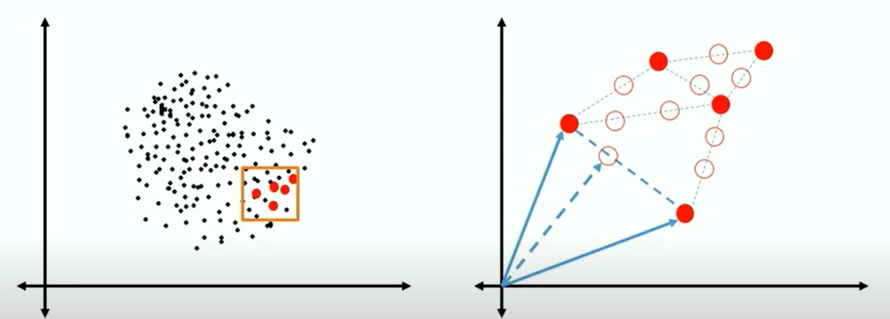

In [ ]:
import collections
from collections import Counter
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

### ADASYN

In [ ]:
# ADASYN
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))
print(len(X_resampled_ada))

## Step 6: Modeling

<div class="alert alert-block alert-info">   

#### Inference:- 
    Here,instead of Accuracy we are very much interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.
   ####  `Recall` actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). 
    Recall shall be the model metric we use to select our best model `when there is a high cost associated with False Negative.`
    In fraud detection, if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be 
    very bad for the bank.

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, plot_roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

## Model 1: Decision Tree

### Default Hyperparameters for SMOTE data

In [ ]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for SMOTE data
dt_smt_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [ ]:
# Lets fit the decision tree with default hyperparameters
dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

<div class="alert alert-block alert-info">
    
As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- 
    Since we got a value of 0.91, our model seems to be doing execellent on the test dataset.

In [ ]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true positive 
TP = confusion_dt_smt[1,1] # true negatives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for ADASYN Data
dt_ada_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- 
    Since we got a value of 0.91, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true positive 
TP = confusion_dt_ada[1,1] # true negatives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Conclusion:- From Decision Tree (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9

## Hyper-parameter tuning
### the `Decision Tree` for SMOTE data (as recall in SMOTE is 84.7 which is higher than ADASYN))
- where precision and F1, Roc values are also higher in SMOTE , so for hypertunning i have choosen SMOTE data fro further analysis

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
     }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [ ]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [ ]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

In [ ]:
grid_search.best_score_

<div class="alert alert-block alert-info">
    
     Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

     Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

     We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Decision Tree from Grid search best estimator as:-  max_depth=20, min_samples_leaf=5, min_samples_split=5, random_state=42.
  
    From these parameters helps us to determines (max_depth) helps us to limit the max number of levels in each decision tree to 20, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5   

- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Decision Tree.

In [ ]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:- 
        Since we got a value of 0.96, our model seems to be doing execellent on the test dataset.

In [ ]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true positive 
TP = confusion_dt_hp_smt[1,1] # true negatives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

In [ ]:
dt_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
    Based on our Decision Tree (Hyperparameter Tuning) model, some features are identified which contribute most to a customer getting churned.<br>
    Top 10 features
    
        hist_trans_avg_amt_24h------0.647044
        amt-------------------------0.211219
        hist_trans_24h--------------0.018109 
        catg_gas_transport----------0.011017
        trans_Hour------------------0.010148
        catg_shopping_pos-----------0.010011
        catg_misc_pos---------------0.009925
        catg_grocery_pos------------0.007709
        catg_misc_net---------------0.007345
        catg_travel-----------------0.006474
  

###  Decision Tree (Hyperparameter Tuning using SMOTE data ) :- 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------


## Model 2: Random Forest

### Default Hyperparameters for SMOTE data

In [ ]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for SMOTE Data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
rf_smt_default.oob_score_

In [ ]:
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true positive 
TP = confusion_rf_smt[1,1] # true negatives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for ADASYN Data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
rf_ada_default.oob_score_

In [ ]:
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_ada = confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true positive 
TP = confusion_rf_ada[1,1] # true negatives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Conclusion:- From Random Forest (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9

## Hyper-parameter tuning 

### for the Random Forest for SMOTE data 

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [5,10],
    'min_samples_split': [5,10],
     }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [ ]:
%%time
Randomized_search.fit(X_resampled_smt, y_resampled_smt)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [ ]:
score_rf = pd.DataFrame(Randomized_search.cv_results_)
score_rf.head()

In [ ]:
Randomized_search.best_score_

<div class="alert alert-block alert-info">
    
    Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

    Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

    We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [ ]:
rf_best = Randomized_search.best_estimator_
rf_best

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Random Forest from Grid search 
    best estimator as - max_depth=20, min_samples_leaf=5, min_samples_split=5,n_jobs=-1, random_state=42
    - By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Random
    Forest.

In [ ]:
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:- 
        Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true positive 
TP = confusion_rf_hp_smt[1,1] # true negatives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Conclusion

<div class="alert alert-block alert-info">
    
Based on our Random Forest (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.353498
    amt-----------------------------0.260826
    hist_trans_avg_amt_30d----------0.070259
    trans_Hour----------------------0.048709
    hist_trans_24h------------------0.045914
    hist_trans_30d------------------0.033208
    weekday_Monday------------------0.017277
    time_since_prev_transaction-----0.015084
    catg_home-----------------------0.015046
    weekday_Sunday------------------0.012544
   

###  Random Forest (Hyperparameters Tuning) :- 


<div class="alert alert-block alert-success">
    

###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
          

## Model 3.   Xgboost 

### Default Hyperparameters for SMOTE data

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data 
model_xgb.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_xgb))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:-
    Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive 
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Fitting the model on Train ADASYN data 
model_xgb.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_xgb))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()

In [ ]:
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive 
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

## Hyper-parameter tuning 

### Of the  `xgboost` for SMOTE data(as SMOTE deafult XBGoost ig giving better results than ADASYN XGBoost)

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[2, 5, 10],
             'n_estimators':[50,100]}          


# specify model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [ ]:
# fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)   

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
cv_results[cv_results['rank_test_score']==1]


In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [ ]:
model_cv.best_score_

In [ ]:
# xgboost_best = grid_search.best_estimator_
# xgboost_best

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 10, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_xgb_new = XGBClassifier(params = params)
model_xgb_new.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
y_train_pred_xgb_hp = model_xgb_new.predict(X_resampled_smt)
y_test_pred_xgb_hp = model_xgb_new.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = model_xgb_new.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive 
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Finally, let's also look at the feature importances.

In [ ]:
model_xgb_new.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": model_xgb_new.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

### Hyper-parameter tuning of xgboost for ADASYN data

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
           SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
          

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

# Conclusion of the Modeling 

<div class="alert alert-block alert-info">

### Compilation of models For Test data (Target 1)

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9
    
###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   2. Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9


###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------       
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   3. Clasification Report for XGBoost on Test data on default Hyperparameter

                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
                   (pp  value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive V 
     -------------------------|-------------|------------|------------|----------|--------------|--------------|--------  
        SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|---------------
        ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
           precision(%)      |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |-ve (%)
         +ve predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive               -------------------------|-------------|------------|------------|----------|--------------|--------------|------------ 
      SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
          -------------------|-------------|------------|------------|----------|--------------|--------------|-------
          

<div class="alert alert-block alert-success">
    
### From the above Compilation of models, it is clear that XGBoost (default hyperparameter tuning using SMOTE data and Tuned using SMOTE data both )is the best model from 3 models i.e
    
     Model 1: Decision Tree  (Default Hyperparameters)
             Decision Tree  (Hyperparameter Tuning)
     Model 2: Random Forest (Default Hyperparameters)
             Random Forest (Hyperparameters Tuning)
     Model 3: XGBoost (Default Hyperparameters)
             XGBoost (Hyperparameters Tuning)


    
### Model Consideration:-
    
- Based on the accuracy, ROC and recall of different models, we will XGBoost on default hyperparameter tuning using ADASYN data as our final model.
- The test accuracy is 99.8%, recall is 90% and ROC is 99.7% .
- The recall for is_fraud is 90%, which is highest among all other models. <b>Since our buisness objective is more important to fraud transactions than the no_fraud transactions accurately. High recall means model will correctly identify almost all customers who are likely to churn.</b>
- Hence `XGBoost on default hyperparameter on ADASYN data ` model is chosen based on its performance on `Recall metric`. 

# Step 7: Final Conclusion on basis of Best Model (XGBoost)

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Inference

#### FINALIZED MODEL: STATS of XGBoost Hyper-parameter tunnig using SMOTE data 

| Metrics     | test    |
| ----------- | ------  |
|RECALL       |  89.6   |
|PRECISION    |  85.2   |
|ACCURACY     |  80.81  |
|F1- SCORE    |  81.7   |
|SPECIFICITY  |  79.26  |

<div class="alert alert-block alert-info">
    
Based on our XGBoost (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.198655
    weekday_Thursday----------------0.050752
    amt-----------------------------0.048412
    weekday_Saturday----------------0.046956
    catg_home-----------------------0.042820
    catg_shopping_pos---------------0.041722
    weekday_Monday------------------0.040901
    catg_grocery_pos----------------0.035625
    catg_health_fitness-------------0.032775
    catg_gas_transport--------------0.032695

## XGBoost hyper-parameter tunning using SMOTE data on train data set 

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20, 
          'n_estimators':50,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_train, y_train)

In [ ]:
pred_train = xgboost_best.predict(X_train)

In [ ]:


print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

## Cost Benefit Anlayis based on model (PART 2)

### `XGBoost on default hyperparameter on SMOTE data  on test data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[552373    451]
     [   300   2595]]
 

In [ ]:
print ('\n Confussion Matrix :\n',confusion_matrix(y_test, y_test_pred_xgb_hp))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)

### `XGBoost on default hyperparameter on SMOTE data  on train data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[1289908      11]
     [     90    6666]]
 

In [ ]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives 
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

In [ ]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2595+451+6666+11)/24

In [ ]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

405.125*1.5

In [ ]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(90+300)/24

In [ ]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

16.25*530.661412288881

In [ ]:
# Cost incurred per month after the model is built and deployed (4+6) 

607.69+8623.247949694316

In [ ]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213392.2204-9230.94

In [ ]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.661412288881

<div class="alert alert-block alert-success">
    
###                           Cost Benefit Analysis(Part 2)
                          Questions                                                                          Answer
    1. Cost incurred per month before the model was deployed (2*3 of part1)----------------------------------213392.2204
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------405.125
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------1.5
    4. Total cost of providing customer support per month for fraudulent transactions 
        detected by the model(TF*$1.5) ----------------------------------------------------------------------607.6875  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------16.25
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*3rd of part 1)----------8623.25
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------9230.94
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------204161.28


## Step 8: Conclusion , Business Insights and Recommendation of strategies to manage fraud transaction based on our observations.


<div class="alert alert-block alert-info">
    

### Conclusion :   
    
           Before Cost incurred/month by the bank== $ 213392.2204
             
           Now Cost incurred/month by bank after my modelling ==$ 9230.94 only
             
### Actual Saving done by bank after my modelling == $ 204161.28 and hence 95.67% of darastic decrease in amount paid by the bank to the customer for their loss by fraud transactions after modelling rather than earlier (before modelling). 

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Business Insights and Recommendation of strategies:

1. The fraudulent transaction probability of a transaction increases with increase in `hist_trans_avg_amt_24h` values. Based upon past spending pattern we have derived`hist_trans_avg_amt_24h` which is actually average amount spent through transactions in last 24 hours by the credit card holder's. So if comparable amount spent in last 24hrs v/s past spent data gets increased then its ideal for Bank to sent an SMS ALERT! to customer confirming about the transactions.
    
2. The fraudulent transaction probability of a transaction increases with increase in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday` values. As per the pattern model shows that major fraud transactions are noticed in `weekday_Thursday`, `weekday_Saturday` and `weekday_Monday`. So banks need to be extra cautious and high alert on this specific days to avoid fradulent transactions

3. The fraudulent transaction probability of a customer increases with increase in `amt` values. At any point in time if bank notices the nature of amount spent is higher then regular spending pattern in such cases bank should noticed the same at early stage by sending neccessary alerts to customers.
   
4. The fraudulent transaction probability of a customer increases with increase in `catg_home`, `catg_shopping_pos`, `catg_grocery_pos`, `catg_health_fitness`, `catg_gas_transport` values. Model predicted that major fraud transactions are occurred in the catg_home, catg_shopping_pos, catg_grocery_pos, catg_health_fitness`, `catg_gas_transports as these are the platform where any customer would spend large transactional amount so as fraudsters also follows the same trend. In such case its always recommended to bank to keep an eye on the track record of spend amount through FLASH SMS ALERT mentioning the detailed transaction history to respective credit card holders.    
      
5. The fraud transactions are majorly done during odd hours of the day i.e. between 22 - 3 Hr so banks needs to ensure to send an SMS ALERT during such odd hours.